In [ ]:
import pandas as pd 
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'c:\\Users\\foma\\Desktop\\jjuwar\\비어플\\2025-겨울 스터디_챗봇\\2025-1 프로젝트_챗봇'

In [3]:
# 출력 시 모든 열이 보이도록 설정
pd.set_option('display.max_columns', None)

In [4]:
Zicbang = pd.read_csv('./직방데이터셋.csv', encoding = 'cp949')

In [6]:
df = Zicbang.copy()

In [44]:
df.shape

(2303, 32)

In [45]:
df.head(2)

,매물ID,거래유형,방종류,룸타입,제목,설명,보증금(만원),월세(만원),관리비(만원),전용면적(m²),층수,총층수,욕실수,방향,입주가능일,승강기,주차여부,주소(법정동),지번주소,위도,경도,옵션,상태,조회수,등록일,수정일,건물유형,도보거리_m,도보시간_분,매물_동입,매물_충무로,기준역
0,40306674,월세,원룸,분리형원룸,"주차O, 공간 활용도 좋은 깔끔한 주방분리형 원룸, 즉시 입주 가능",?? 매물 정보 ??\n- 주방이 분리된 원룸으로 조리 시 음식냄새 걱정 없습니다....,1000,46,0.0,16.50,반지하,3,1,NW,즉시 입주 가능,False,주차 가능,서울시 강북구 미아동,강북구 미아동 307-76,37.623966,127.022695,"에어컨, 냉장고, 세탁기, 인덕션, 전자레인지, 싱크대",open,0,2017.02.23,2025/02/10 19:40,다중주택,566.0,7,29,26,미아역
1,41744227,월세,원룸,분리형원룸,"아늑하고 깔끔한 분리형 원룸, 즉시 입주 가능, 주차 가능, 풀옵션 완비","?? 이 집의 특징 ??\n- 분리형 원룸으로 공간 활용이 좋습니다.\n- 싱크대,...",5000,160,8.0,29.72,4,5,1,NW,즉시 입주 가능,True,주차 가능,서울시 서초구 방배동,서초구 방배동 437-22,37.482251,126.983535,"에어컨, 냉장고, 세탁기, 인덕션, 신발장, 싱크대",open,0,2021.08.20,2024/12/27 12:00,다세대주택,651.0,11,35,32,총신대입구(이수)역


In [46]:
df2 = df.iloc[:, -8:]

In [47]:
df2

,등록일,수정일,건물유형,도보거리_m,도보시간_분,매물_동입,매물_충무로,기준역
0,2017.02.23,2025/02/10 19:40,다중주택,566.0,7,29,26,미아역
1,2021.08.20,2024/12/27 12:00,다세대주택,651.0,11,35,32,총신대입구(이수)역
2,1987.07.08,2024/12/27 15:47,단독주택,955.0,12,34,31,연신내역
3,2018.12.24,2025/01/02 10:56,다가구주택,638.0,9,33,30,수유역
4,2011.08.31,2024/12/30 14:16,고시원,426.0,6,28,25,연신내역
...,...,...,...,...,...,...,...,...
2298,2016-02-12,2025/03/26 14:07,단독주택,NaN,10,33,31,안암역
2299,2023.01,2025/03/26 14:11,도시형생활주택,544.0,8,11,8,충무로역
2300,1990-12-28,2025/03/26 14:22,주택 및 근린생활시설,322.0,4,26,23,연신내역
2301,2023.01.27,2025/03/26 14:25,오피스텔,946.0,13,17,14,을지로3가역


In [48]:
df2_info = df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록일     2302 non-null   object 
 1   수정일     2303 non-null   object 
 2   건물유형    2303 non-null   object 
 3   도보거리_m  1897 non-null   float64
 4   도보시간_분  2303 non-null   int64  
 5   매물_동입   2303 non-null   object 
 6   매물_충무로  2303 non-null   int64  
 7   기준역     2302 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 144.1+ KB


In [49]:
df2.isnull().sum()

등록일         1
수정일         0
건물유형        0
도보거리_m    406
도보시간_분      0
매물_동입       0
매물_충무로      0
기준역         1
dtype: int64

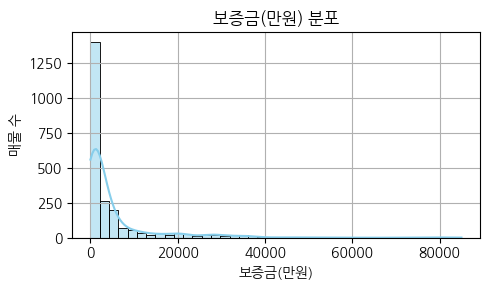

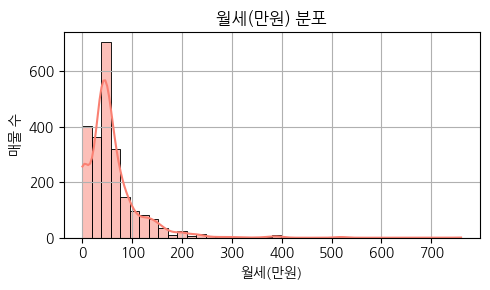

C:\Users\foma\AppData\Local\Temp\ipykernel_18024\3291346390.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='방종류', order=df['방종류'].value_counts().index, palette='pastel')


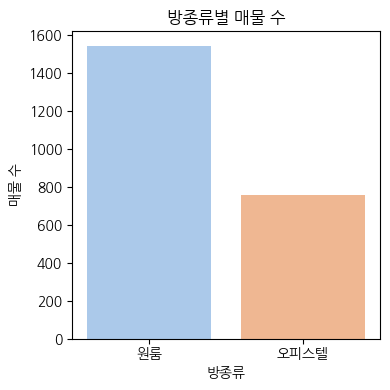

In [ ]:

# 1. 보증금 분포
plt.figure(figsize=(5, 3))
sns.histplot(df['보증금(만원)'], bins=40, kde=True, color='skyblue')
plt.title("보증금(만원) 분포")
plt.xlabel("보증금(만원)")
plt.ylabel("매물 수")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 월세 분포
plt.figure(figsize=(5, 3))
sns.histplot(df['월세(만원)'], bins=40, kde=True, color='salmon')
plt.title("월세(만원) 분포")
plt.xlabel("월세(만원)")
plt.ylabel("매물 수")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 방종류 개수 시각화
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='방종류', order=df['방종류'].value_counts().index, palette='pastel')
plt.title("방종류별 매물 수")
plt.xlabel("방종류")
plt.ylabel("매물 수")
plt.tight_layout()
plt.show()


In [18]:
df['방종류'].value_counts()

방종류
원룸      1543
오피스텔     760
Name: count, dtype: int64